<h1 align=center> Proceso de EDA</h1>

In [267]:
# Instalacion de librerias de ser necesario
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [268]:
# Importacion de librerias 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [269]:
# Ubicaciones de los archivos 
siniestros_data = pd.read_csv('Database/Data_siniestros.csv') 

In [270]:
# Chequeo de la informacion del dataframe
siniestros_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               716 non-null    object 
 1   Num_Victimas     716 non-null    int64  
 2   Fecha            716 non-null    object 
 3   Año              716 non-null    int64  
 4   Mes              716 non-null    int64  
 5   Dia              716 non-null    int64  
 6   Hora_Exacta      716 non-null    object 
 7   Hora             716 non-null    object 
 8   Lugar_del_hecho  716 non-null    object 
 9   Tipo_calle       716 non-null    object 
 10  Calle            716 non-null    object 
 11  Direccion        716 non-null    object 
 12  Comuna           716 non-null    int64  
 13  pos x            716 non-null    object 
 14  pos y            716 non-null    object 
 15  Participantes    716 non-null    object 
 16  Victima          716 non-null    object 
 17  Acusado         

In [271]:
# Observacion de TODOS los nombres de las columnas
siniestros_data.columns

Index(['Id', 'Num_Victimas', 'Fecha', 'Año', 'Mes', 'Dia', 'Hora_Exacta',
       'Hora', 'Lugar_del_hecho', 'Tipo_calle', 'Calle', 'Direccion', 'Comuna',
       'pos x', 'pos y', 'Participantes', 'Victima', 'Acusado', 'Rol', 'Sexo',
       'Edad', 'Rango_etario', 'Dia_nombre'],
      dtype='object')

In [272]:
# Observacion de TODOS los tipos de las columnas
siniestros_data.dtypes

Id                  object
Num_Victimas         int64
Fecha               object
Año                  int64
Mes                  int64
Dia                  int64
Hora_Exacta         object
Hora                object
Lugar_del_hecho     object
Tipo_calle          object
Calle               object
Direccion           object
Comuna               int64
pos x               object
pos y               object
Participantes       object
Victima             object
Acusado             object
Rol                 object
Sexo                object
Edad               float64
Rango_etario        object
Dia_nombre          object
dtype: object

In [273]:
# Conversion de columnas de tipo object a category
siniestros_data[['Tipo_calle', 'Comuna', 'Victima', 'Acusado', 'Rol', 'Sexo', 'Rango_etario', 'Dia_nombre']] = siniestros_data[['Tipo_calle', 'Comuna', 'Victima', 'Acusado', 'Rol', 'Sexo', 'Rango_etario', 'Dia_nombre']] .astype('category')

In [274]:
# Conversion de columna Fecha a datetime para mejor analisis
siniestros_data['Fecha'] = pd.to_datetime(siniestros_data['Fecha'], format='%Y-%m-%d')


<h2> Analisis de duplicados y nulos </h2>

In [275]:
# Precensia de elementos duplicados
siniestros_data.duplicated().sum()

0

In [276]:
# Precensia de elementos nulos
siniestros_data.isna().sum().sort_values(ascending = False)

Rango_etario       52
Edad               52
Id                  0
Comuna              0
Sexo                0
Rol                 0
Acusado             0
Victima             0
Participantes       0
pos y               0
pos x               0
Direccion           0
Num_Victimas        0
Calle               0
Tipo_calle          0
Lugar_del_hecho     0
Hora                0
Hora_Exacta         0
Dia                 0
Mes                 0
Año                 0
Fecha               0
Dia_nombre          0
dtype: int64

<Axes: >

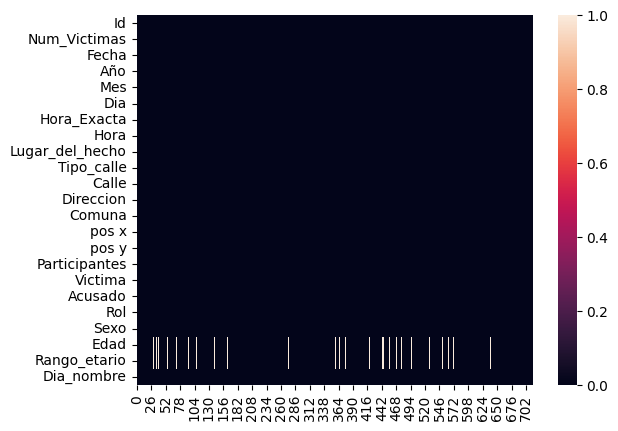

In [277]:
# Visualizacion de los valores nulos / visualization of missing values
(
    siniestros_data
    .isnull()
    .transpose()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

<h2>VARIABLES NUMÉRICAS</h2>

In [278]:
siniestros_data.describe(include=[np.number])

,Num_Victimas,Año,Mes,Dia,Edad
count,716.000000,716.000000,716.000000,716.000000,664.000000
mean,1.061453,2018.177374,6.682961,15.951117,42.167169
std,0.257193,1.671846,3.573999,8.680602,19.788034
min,1.000000,2016.000000,1.000000,1.000000,1.000000
25%,1.000000,2017.000000,4.000000,9.000000,27.000000
50%,1.000000,2018.000000,7.000000,16.000000,37.000000
75%,1.000000,2019.000000,10.000000,23.000000,56.250000
max,3.000000,2021.000000,12.000000,31.000000,95.000000


<function matplotlib.pyplot.show(close=None, block=None)>

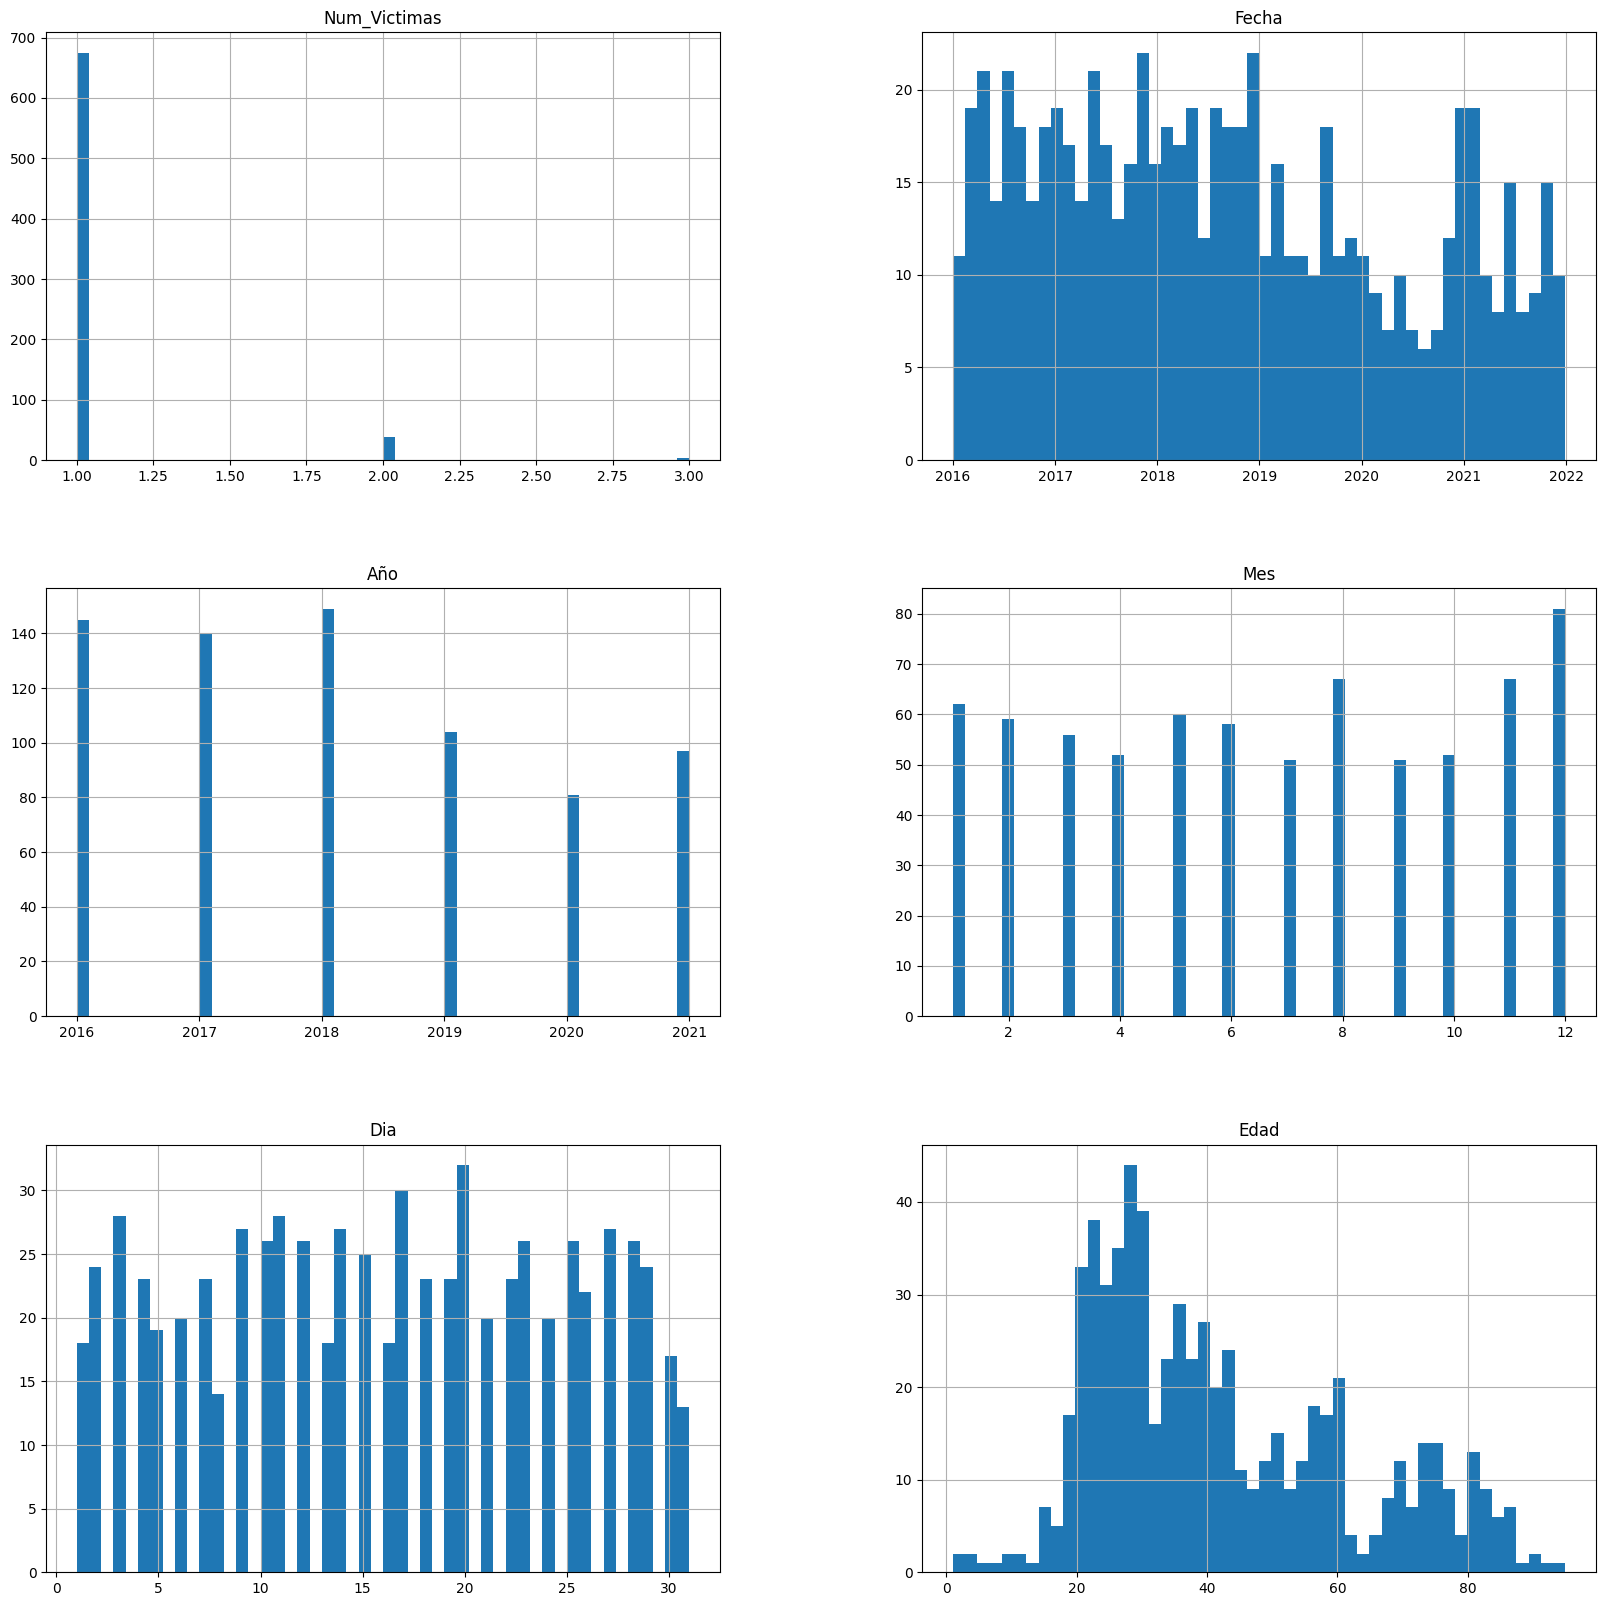

In [279]:
siniestros_data.hist(bins=50,figsize=(20,20))
plt.show


* Num_Victimas: Es mucho mas probable 1 victima por accidentes.
* Fecha y Año : Hubieron alzas de accidentes a finales de 2017 y finales de 2019, tambien se refleja una reduccion en el numero de accidentes debido al coronavirus entre el 2019 y 2021 ( Se realizara un segundo grafico para mejor comprension)
* Mes: Hay un alza de accidentes en los ultimos meses 
* Hora: Incremento de accidentes en las horas de la mañana.
* Edad: Es importante el espacio comprendido entre 20 y 40 años que nos da a entender


Es necesario un analisis de las variables categoricas para tener un analisis general mas concluyente.

In [280]:
siniestros_data.describe(include='category')

,Tipo_calle,Comuna,Victima,Acusado,Rol,Sexo,Rango_etario,Dia_nombre
count,716,716,716,716,716,716,664,716
unique,3,16,9,10,5,3,5,7
top,AVENIDA,1,MOTO,AUTO,CONDUCTOR,MASCULINO,Entre 21 y 40,Sabado
freq,511,93,302,210,330,545,327,110


In [281]:
def graficos_eda_categoricos(cat):

    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

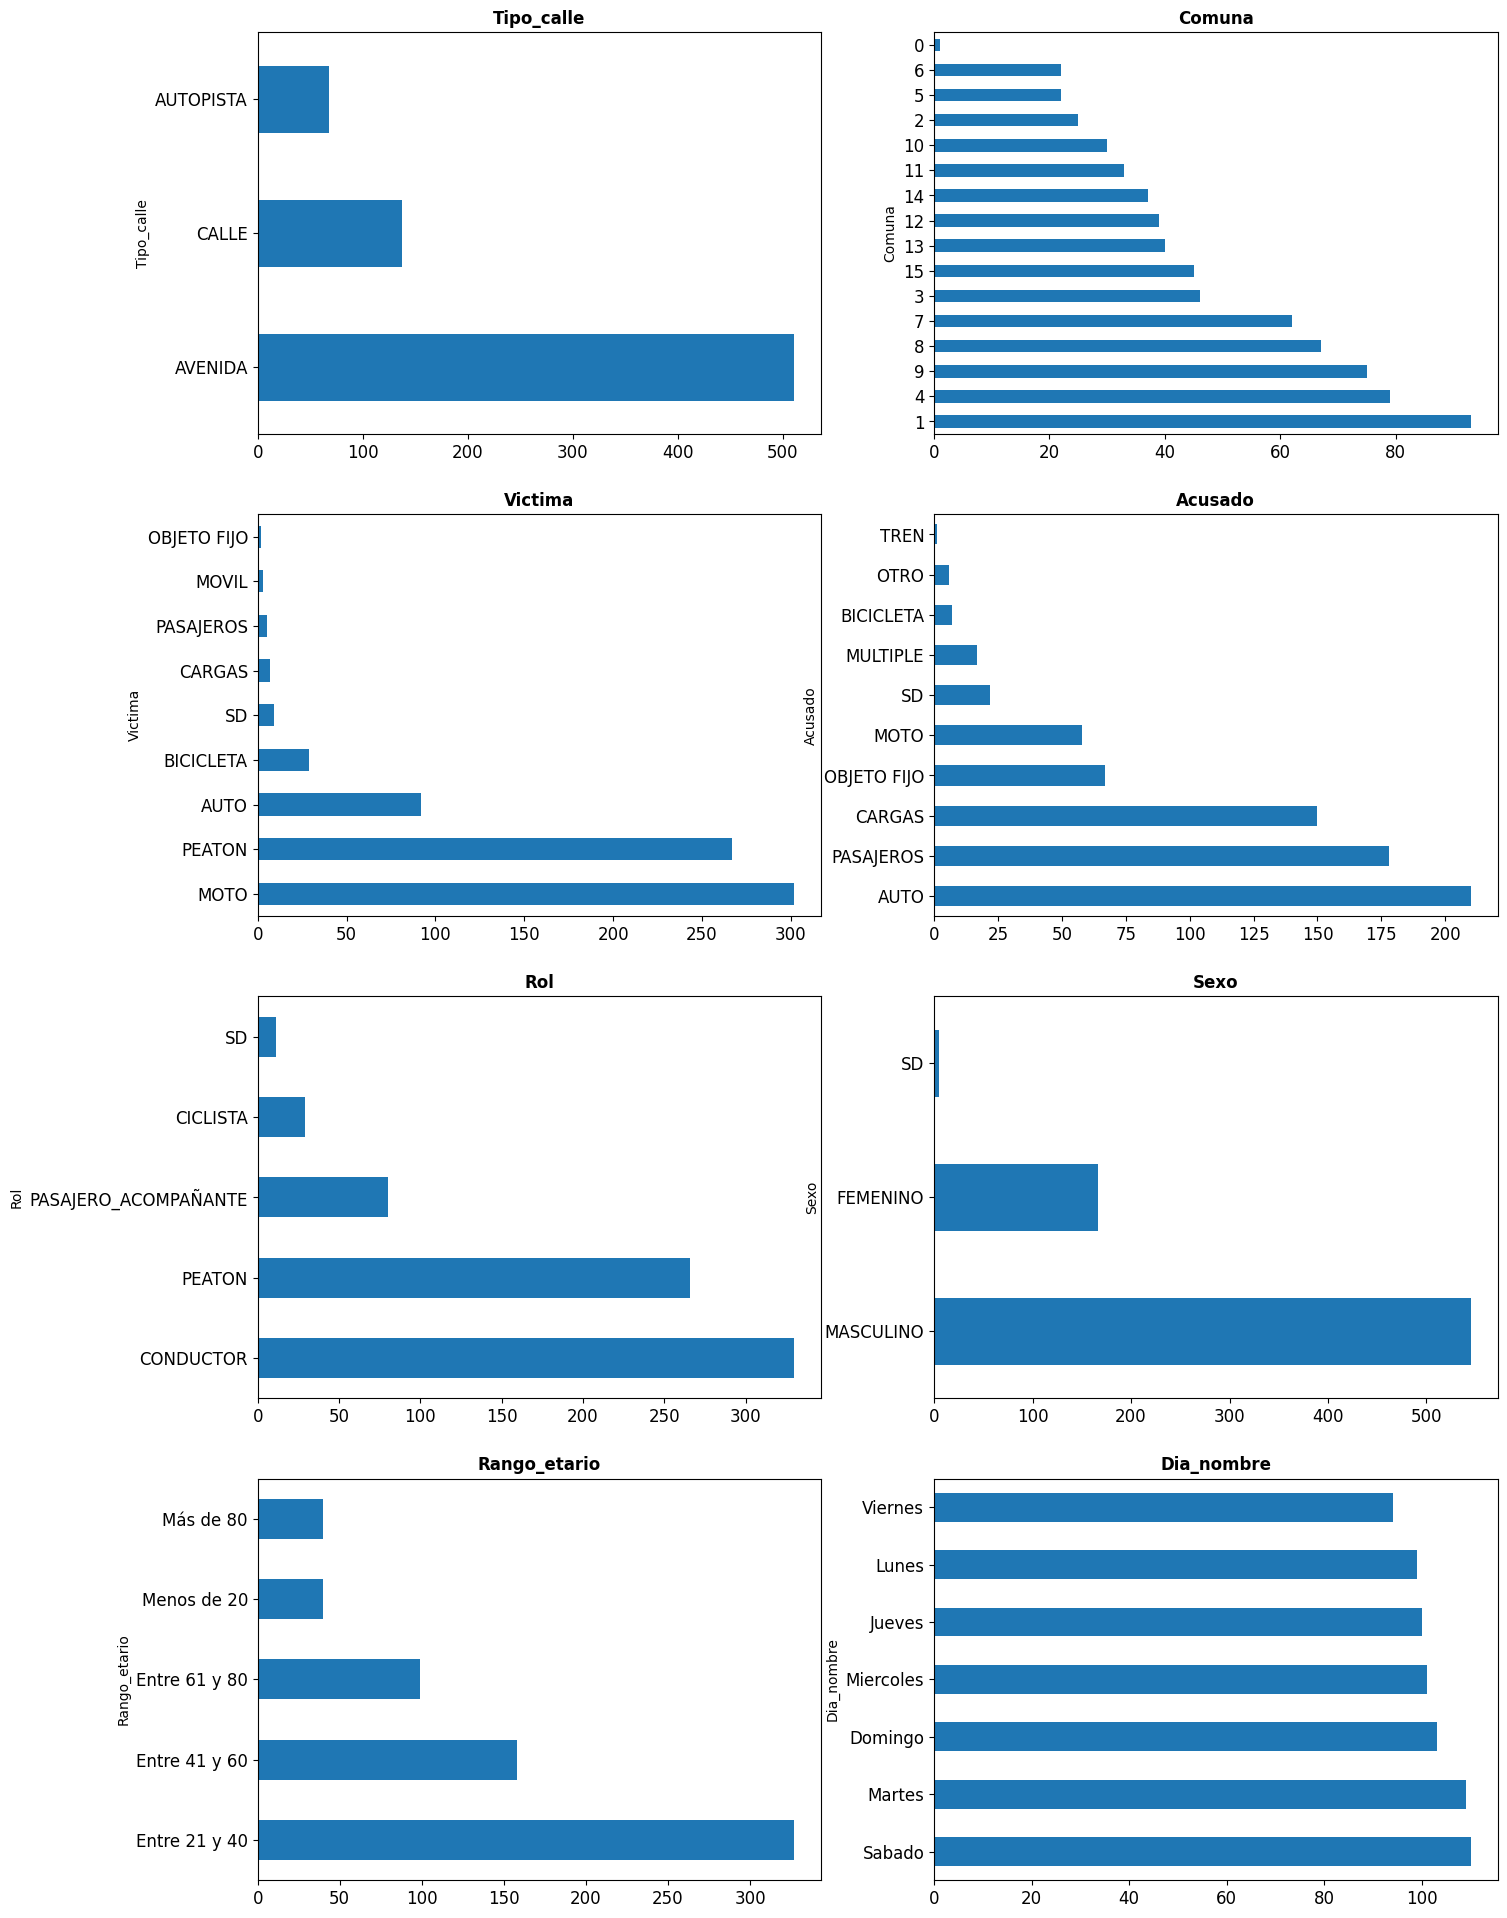

In [282]:
graficos_eda_categoricos(siniestros_data.select_dtypes('category'))

Es posible corroborar lo que ya demostraba la describcion de las variables categoricas, la existencia de un perfil en los accidentes

  * Tipo_calle: Avenida
  * Comuna: Comuna '1'
  * Victima: Conductores de 'MOTO'
  * Acusado: Conductores de 'AUTO'
  * Rol: las victimas son 'CONDUCTOR'
  * Sexo: 'MASCULINO'
  * Rango_etario: 'Entre 21 y 40 años'
  * Dia_nombre:  Reiteradamente 'entre martes y sabado'

Ademas la observacion de cada uno de los graficos evidencia la poca relevancia de la informacion sin datos "SD"

In [283]:
# Imputaciones de datos debido a la poca relevancia de la etiqueta sin datos
siniestros_data = siniestros_data.assign(Comuna=siniestros_data['Comuna'].replace({0: 1}))
siniestros_data = siniestros_data.assign(Victima=siniestros_data['Victima'].replace({'SD': 'MOTO'}))
siniestros_data = siniestros_data.assign(Acusado=siniestros_data['Acusado'].replace({'SD': 'AUTO'}))
siniestros_data = siniestros_data.assign(Rol = siniestros_data['Rol'].replace({'SD': 'CONDUCTOR'}))
siniestros_data = siniestros_data.assign(Sexo = siniestros_data['Sexo'].replace({'SD': 'MASCULINO'}))

C:\Users\AA\AppData\Local\Temp\ipykernel_12944\545198933.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  siniestros_data = siniestros_data.assign(Comuna=siniestros_data['Comuna'].replace({0: 1}))
C:\Users\AA\AppData\Local\Temp\ipykernel_12944\545198933.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  siniestros_data = siniestros_data.assign(Victima=siniestros_data['Victima'].replace({'SD': 'MOTO'}))
C:\Users\AA\AppData\Local\Temp\ipykernel_12944\545198933.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is de

In [284]:
siniestros_data.head(3)

,Id,Num_Victimas,Fecha,Año,Mes,Dia,Hora_Exacta,Hora,Lugar_del_hecho,Tipo_calle,...,pos x,pos y,Participantes,Victima,Acusado,Rol,Sexo,Edad,Rango_etario,Dia_nombre
0,2016-0001,1,2016-01-01,2016,1,1,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19.0,Menos de 20,Viernes
1,2016-0002,1,2016-02-01,2016,1,2,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,AVENIDA,...,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70.0,Entre 61 y 80,Lunes
2,2016-0003,1,2016-03-01,2016,1,3,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30.0,Entre 21 y 40,Martes


In [285]:
# Guardo el DataFrame como archivo CSV en la ruta especificada
siniestros_data.to_csv("Database/Data_dashboard.csv", index=False)

In [286]:
# Agrupar por año y mes, y sumar el número de víctimas
Victimas_anuales = siniestros_data.groupby(["Año", "Mes"])["Num_Victimas"].sum().reset_index()
Victimas_anuales

,Año,Mes,Num_Victimas
0,2016,1,8
1,2016,2,12
2,2016,3,15
3,2016,4,11
4,2016,5,7
...,...,...,...
67,2021,8,9
68,2021,9,4
69,2021,10,5
70,2021,11,8


<h2>Victimas Anuales (2016-2021)</h2>

In [287]:
# Combinar AÑO y MES para obtener una sola variable de tiempo, creando la columna "Fecha" como str
Victimas_anuales["Año_mes"] = Victimas_anuales["Año"].astype(str) + "-" + Victimas_anuales["Mes"].astype(str)

# Convertir la variable de tiempo a formato datetime
Victimas_anuales["Año_mes"] = pd.to_datetime(Victimas_anuales["Año_mes"])

# Ordenar el DataFrame por fecha para que tenga orden cronológico
rel_tiempo = Victimas_anuales.sort_values("Año_mes")

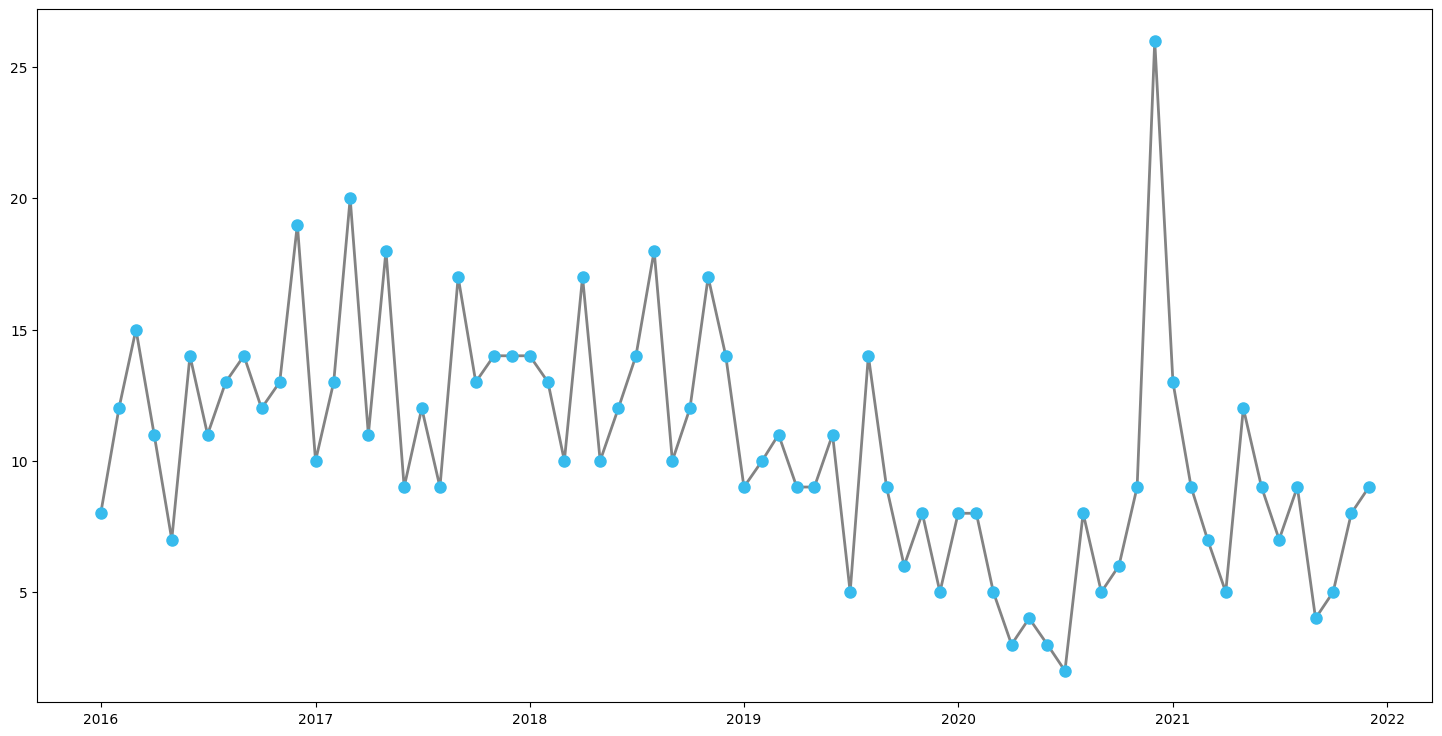

In [288]:
# Creacion de la figura
plt.figure(figsize=(18, 9))

# Trazamos la línea 
plt.plot(Victimas_anuales["Año_mes"], Victimas_anuales["Num_Victimas"], color='#838383', linewidth=2)  # Set line color and width

# Colocamos los marcadores
plt.plot(Victimas_anuales["Año_mes"], Victimas_anuales["Num_Victimas"], marker='o', markersize=8, color='#37BBED', linestyle='none')  # Set marker color, size, and no line

Extendiendo la conclucion anterior es notable reduccion en el numero de accidentes debido al coronavirus entre el 2019 y 2021, el cual momentariamente tuvo un repunte que podemos asociar con la euforia provocada a la finalizacion del confinamiento, a pesar de esto ultimo, se regresa a un control quizas provocado por un rebrote de la enfermedad.